In [1]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [17]:
def solve_lorenz(N=1, angle=0.0, max_time=20.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

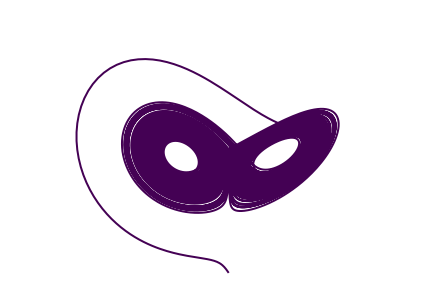

In [25]:
t, x_t = solve_lorenz(angle=120, N=1, max_time = 100)

In [131]:
np.random.seed(1)
x0 = -75+150 * np.random.random((1, 3))

In [105]:
x0 = -15 + 30 * np.random.random((2, 3))

In [132]:
x0 = np.concatenate([x0, x0+(-0.000000005 + 0.00000001*np.random.random((1, 3)))])

In [133]:
N=2
angle=0.0
max_time=100.0
sigma=10.0
beta=8./3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [134]:
x0

array([[-12.44669929,  33.04867402, -74.98284378],
       [-12.4466993 ,  33.04867401, -74.98284378]])

In [135]:
# Solve for the trajectories
t = np.linspace(0, max_time, int(250*max_time))
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                  for x0i in x0])

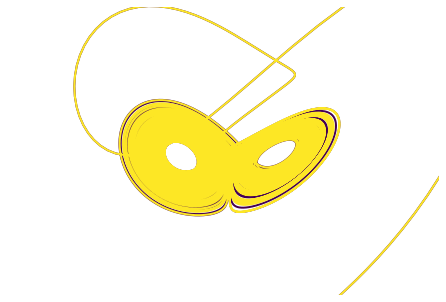

In [136]:
angle= 120
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))
# choose a different color for each trajectory
colors = plt.cm.viridis(np.linspace(0, 1, N))

for i in range(N):
    x, y, z = x_t[i,:,:].T
    lines = ax.plot(x, y, z, '-', c=colors[i])
    plt.setp(lines, linewidth=2)

ax.view_init(30, angle)
plt.show()


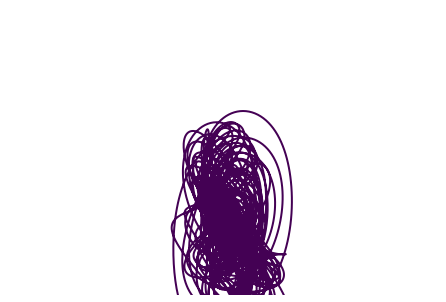

In [144]:
angle= 30
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))
# choose a different color for each trajectory
colors = plt.cm.viridis(np.linspace(0, 1, N))

for i in range(N-1):
    x, y, z = x_t[i+1,:,:].T - x_t[i,:,:].T
    lines = ax.plot(x, y, z, '-', c=colors[i])
    plt.setp(lines, linewidth=2)

ax.view_init(30, angle)
plt.show()

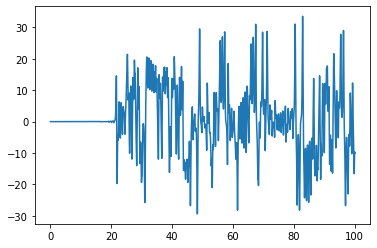

In [145]:
plt.plot(t,x)

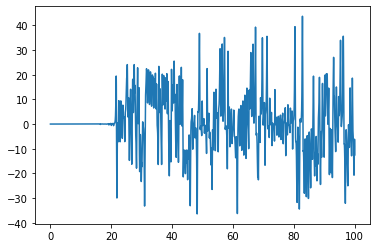

In [146]:
plt.plot(t,y)

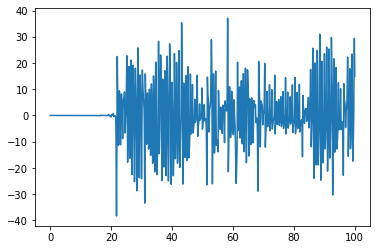

In [147]:
plt.plot(t,z)

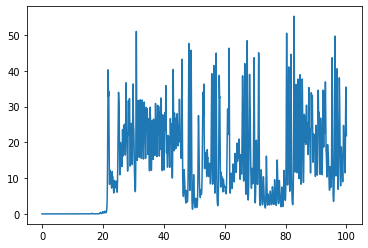

In [148]:
plt.plot(t, np.sqrt(np.square(x)+np.square(y)+np.square(z)))

In [19]:

w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 100.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=1, description='N', max=50), FloatSlider(value=0.0, description='angle',…